In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t
from scipy.misc import derivative
import scipy
import sympy
import scipy.integrate as spi
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family = 'Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False


## 적분
- 적분은 미분과 반대되는 개념. 부정적분과 정적분이 있다.
 - 부정적분은 정확하게 미분과 반대되는 개념. 즉 반 미분이다. 어떤 함수를 미분하여 나온 결과인 도함수라고 가정하고 이 도함수 f(x)에 대한 미분되기 전의 원래의 함수를 찾는 과정 또는 그 결과를 의미
 - 정적분은 독립변수 x가 어떤 구간 [a,b] 사이일 때 그 구간에서 함수 f(x)의 값과 수평선(x축)이 이루는 면적을 구하는 행위 혹은 그 값을 의미
 
적분의 개념 : https://www.youtube.com/watch?v=kV2j3S5qBm4

미분과 적분의 관계 : https://www.youtube.com/watch?v=xAAAvj7bmKQ

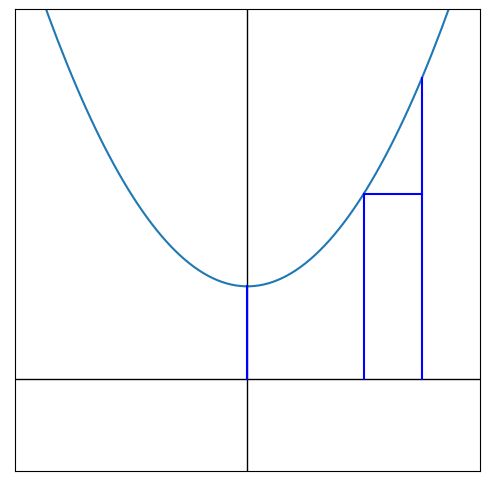

In [2]:
def f(x) :
    return x**2 + 1

xx = np.linspace(-4.0, 4.0, 200)
yy = f(xx)

plt.figure(figsize=(6,6))

plt.xlim(-2,2)
plt.ylim(-1,4)

plt.plot(xx, yy)
plt.plot([-2,2],[0,0],c='k',lw=1)
plt.plot([0,0],[-1,4],c='k',lw=1)
plt.plot([0,0],[0,f(0)],c='b')
plt.plot([1,1],[0,f(1)],c='b')
plt.plot([1.5,1.5],[0,f(1.5)],c='b')
plt.plot([1,1.5],[f(1),f(1)],c='b')

plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')

plt.show()

In [3]:
x, y = sympy.symbols('x y')

f = 2 * x + y
f

2*x + y

In [4]:
sympy.integrate(f, x)

x**2 + x*y

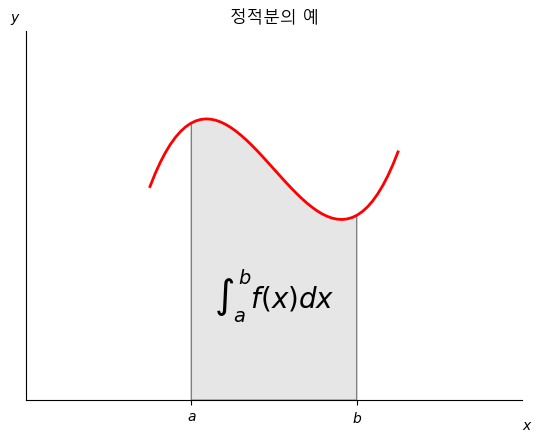

In [5]:
from matplotlib.patches import Polygon


def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6


a, b = 0, 2
x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)
plt.title("정적분의 예")

plt.plot(x, y, 'r', linewidth=2)

plt.ylim(bottom=0)
ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])
ax.set_xlim(-2, 4)
ax.set_ylim(0, 8)

plt.show()

In [19]:
x, y = sympy.symbols('x y')

f = x ** 3 - 3 * x ** 2 + x + 6

f

x**3 - 3*x**2 + x + 6

In [20]:
# 부정적분

F = sympy.integrate(f)

F

x**4/4 - x**3 + x**2/2 + 6*x

In [21]:
# 정적분 - 정확한 적분값

sympy.integrate(f, (x, 0, 2))

10

In [22]:
# 수치적분 - 근시적인 적분값

def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6

result, error = spi.quad(f, 0, 2)

print(result)

10.0
